### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv", delimiter=',')
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [3]:
lines = open("Data_Dictionary.txt", "r")
for i in lines:
    print(i)

Field Name				Definition

RefID				        Unique (sequential) number assigned to vehicles

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 

PurchDate				The Date the vehicle was Purchased at Auction

Auction					Auction provider at which the  vehicle was purchased

VehYear					The manufacturer's year of the vehicle

VehicleAge				The Years elapsed since the manufacturer's year

Make					Vehicle Manufacturer 

Model					Vehicle Model

Trim					Vehicle Trim Level

SubModel				Vehicle Submodel

Color					Vehicle Color

Transmission				Vehicles transmission type (Automatic, Manual)

WheelTypeID				The type id of the vehicle wheel

WheelType				The vehicle wheel type description (Alloy, Covers)

VehOdo					The vehicles odometer reading

Nationality				The Manufacturer's country

Size					The size category of the vehicle (Compact, SUV, etc.)

TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers

MMRAcquisitionAuctionAve

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

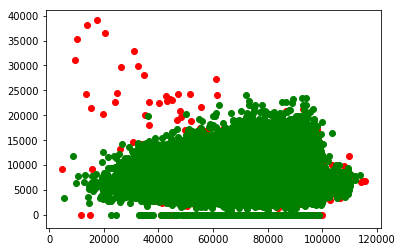

In [5]:
is_bad = data.loc[data.IsBadBuy != 0, ('VehOdo', 'MMRCurrentRetailAveragePrice')]
plt.scatter(is_bad.VehOdo, is_bad.MMRCurrentRetailAveragePrice, color = 'red')

isnt_bad = data.loc[data.IsBadBuy == 0, ('VehOdo', 'MMRCurrentRetailAveragePrice')]
plt.scatter(isnt_bad.VehOdo, isnt_bad.MMRCurrentRetailAveragePrice, color = 'green')

plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [6]:
from sklearn import *
import numpy as np

In [7]:
X = ['VehOdo', 'MMRCurrentRetailAveragePrice']
Y = ['IsBadBuy']

not_null_VehOdo = data.loc[pd.notnull(data.VehOdo), X + Y]
not_null_AvrPrice = not_null_VehOdo.loc[pd.notnull(data.MMRCurrentRetailAveragePrice), X + Y]

In [8]:
train_data_size = 35000

model1 = linear_model.LinearRegression()
train_X = np.asarray(not_null_AvrPrice.loc[:train_data_size, X])
train_Y = np.asarray(not_null_AvrPrice.loc[:train_data_size, Y])

model1.fit(train_X, train_Y)
print('Coefficient: ', model1.coef_)
print('Coefficient of determination: ', model1.score(train_X, train_Y))

Coefficient:  [[ 1.94850283e-06 -1.05072810e-05]]
Coefficient of determination:  0.017327916598814497


## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [9]:
test_X = np.asarray(not_null_AvrPrice.loc[train_data_size:, X])
test_Y = np.asarray(not_null_AvrPrice.loc[train_data_size:, Y])
prediction = model1.predict(test_X)

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [10]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [11]:
print(metrics.classification_report(test_Y, predictionClass))
print(metrics.confusion_matrix(test_Y, predictionClass))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93     32884
           1       0.00      0.00      0.00      4927

   micro avg       0.87      0.87      0.87     37811
   macro avg       0.43      0.50      0.47     37811
weighted avg       0.76      0.87      0.81     37811

[[32884     0]
 [ 4927     0]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [12]:
model2 = tree.DecisionTreeClassifier(max_depth=20)

In [13]:
model2.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [14]:
prediction2 = model2.predict_proba(test_X)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [15]:
predictionClass2 = [prediction2[i][0] < prediction2[i][1] for i in range(prediction2.shape[0])]

In [16]:
print(metrics.classification_report(test_Y, predictionClass2))
print(metrics.confusion_matrix(test_Y, predictionClass2))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32884
           1       0.18      0.08      0.11      4927

   micro avg       0.83      0.83      0.83     37811
   macro avg       0.53      0.51      0.51     37811
weighted avg       0.78      0.83      0.80     37811

[[31117  1767]
 [ 4543   384]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [17]:
train_X = np.asarray(not_null_AvrPrice.loc[:train_data_size, X])
train_Y = np.asarray(not_null_AvrPrice.loc[:train_data_size, Y])

test_X = np.asarray(not_null_AvrPrice.loc[train_data_size:, X])
test_Y = np.asarray(not_null_AvrPrice.loc[train_data_size:, Y])

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [18]:
max_depth = [1, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61]

for i in max_depth:
    print("Depth: ", i)
    model_i = tree.DecisionTreeClassifier(max_depth = i)
    model_i.fit(train_X, train_Y)
    prediction_i = model_i.predict(train_X)
    print("Train Accuracy: ", metrics.accuracy_score(train_Y, prediction_i))
    
    prediction_i = model_i.predict(test_X)
    print("Test Accuracy: ", metrics.accuracy_score(test_Y, prediction_i))

Depth:  1
Train Accuracy:  0.8847610304664639
Test Accuracy:  0.8696940043902568
Depth:  3
Train Accuracy:  0.8850192208388318
Test Accuracy:  0.869932030361535
Depth:  5
Train Accuracy:  0.8850765964771358
Test Accuracy:  0.869852688371109
Depth:  7
Train Accuracy:  0.8861380457857594
Test Accuracy:  0.868794795165428
Depth:  11
Train Accuracy:  0.8924780538183488
Test Accuracy:  0.8635582237973076
Depth:  13
Train Accuracy:  0.89899018876585
Test Accuracy:  0.858057179127767
Depth:  17
Train Accuracy:  0.9168053244592346
Test Accuracy:  0.8446483827457618
Depth:  19
Train Accuracy:  0.9273050662688622
Test Accuracy:  0.8376133929279839
Depth:  23
Train Accuracy:  0.949566813930805
Test Accuracy:  0.8203168390151014
Depth:  29
Train Accuracy:  0.9780538183487292
Test Accuracy:  0.8005342360688689
Depth:  31
Train Accuracy:  0.9844798898387744
Test Accuracy:  0.7951389807198963
Depth:  37
Train Accuracy:  0.9961558322336336
Test Accuracy:  0.7851947845864959
Depth:  41
Train Accuracy: 

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [22]:
model3 = tree.DecisionTreeClassifier(max_depth = 20)
model3.fit(train_X, train_Y)

prediction3 = model3.predict_proba(train_X)
predictionClass3 = [1 if prediction3[i][0] > 0.5 else 0 for i in range(prediction3.shape[0])]

In [23]:
summ = 0.0
for i in range(len(train_Y)):
    if predictionClass3[i] != train_Y[i]:
        if train_Y[i] == 0:
            summ += 1000
        else:
            summ += 100
summ /= len(train_Y)

print("Loss function: ", summ)

Loss function:  886.7605714613575


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [24]:
parameters = [i * 0.05 for i in range(1, 20)]
for parameter in parameters:
    print("Parameter: ", parameter)
    predictionClass_i = [1 if prediction3[i][0] > parameter else 0 for i in range(prediction3.shape[0])]
    
    summ = 0.0
    for i in range(len(train_Y)):
        if predictionClass_i[i] != train_Y[i]:
            if train_Y[i] == 0:
                summ += 1000
            else:
                summ += 100
    summ /= len(train_Y)
    print("Loss function: ", summ)
    

Parameter:  0.05
Loss function:  889.4113259510012
Parameter:  0.1
Loss function:  889.4113259510012
Parameter:  0.15000000000000002
Loss function:  889.4055883871708
Parameter:  0.2
Loss function:  889.3711630041885
Parameter:  0.25
Loss function:  889.3310000573756
Parameter:  0.30000000000000004
Loss function:  889.3310000573756
Parameter:  0.35000000000000003
Loss function:  888.9637959722302
Parameter:  0.4
Loss function:  888.5535601583567
Parameter:  0.45
Loss function:  888.1806185093809
Parameter:  0.5
Loss function:  886.7605714613575
Parameter:  0.55
Loss function:  886.7605714613575
Parameter:  0.6000000000000001
Loss function:  885.9630500889323
Parameter:  0.65
Loss function:  884.6692294451776
Parameter:  0.7000000000000001
Loss function:  881.9610993172299
Parameter:  0.75
Loss function:  871.5761087842102
Parameter:  0.8
Loss function:  856.4662344368581
Parameter:  0.8500000000000001
Loss function:  803.2159045269378
Parameter:  0.9
Loss function:  630.693097710712
Pa